In [4]:
# 📓 03_query_examples.ipynb

# --- Setup ---
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Path to parquet data
PARQUET_PATH = "/content/drive/MyDrive/ColabNotebooks/SIH2025/Data/argo_prototype_parquet/*.parquet"

# Load all parquet files with Dask
df = dd.read_parquet(PARQUET_PATH)

# Example filter: Bay of Bengal, ~500m depth, year 2023
subset = df[
    (df.LATITUDE.between(5, 20)) &
    (df.LONGITUDE.between(80, 95)) &
    (df.DEPTH_M.between(490, 510)) &
    (df.JULD.dt.year == 2023)
]

# Convert to pandas for analysis
result = subset.compute()
print("✅ Data subset ready:", result.shape)
print(result.head())


✅ Data subset ready: (754, 7)
       LATITUDE  LONGITUDE                          JULD     DEPTH_M     TEMP  \
37705  6.981966  90.029938 2023-01-05 14:25:45.999996416  492.010010  10.0706   
37706  6.981966  90.029938 2023-01-05 14:25:45.999996416  494.010010  10.0524   
37707  6.981966  90.029938 2023-01-05 14:25:45.999996416  495.959991  10.0450   
37708  6.981966  90.029938 2023-01-05 14:25:45.999996416  497.980011  10.0080   
37709  6.981966  90.029938 2023-01-05 14:25:45.999996416  500.000000   9.9838   

            PSAL       source_file  
37705  35.053902  20230105_prof.nc  
37706  35.052399  20230105_prof.nc  
37707  35.051601  20230105_prof.nc  
37708  35.050400  20230105_prof.nc  
37709  35.049198  20230105_prof.nc  


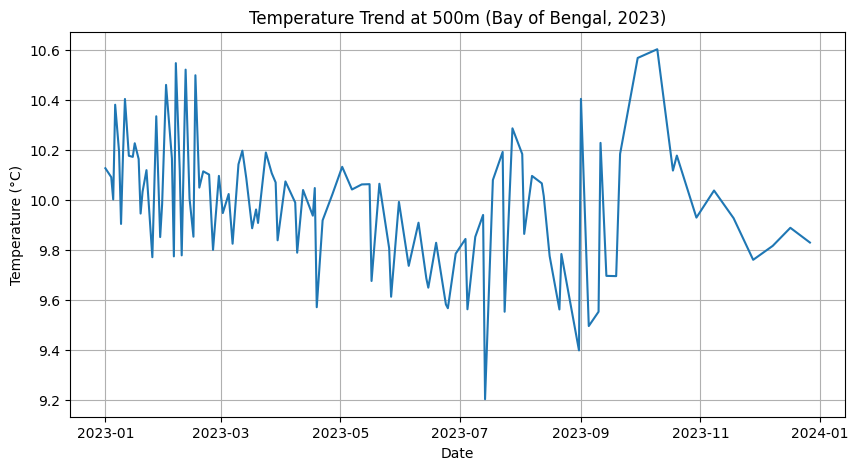

In [5]:
trend = result.groupby(result["JULD"].dt.date)["TEMP"].mean()

plt.figure(figsize=(10,5))
trend.plot()
plt.title("Temperature Trend at 500m (Bay of Bengal, 2023)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


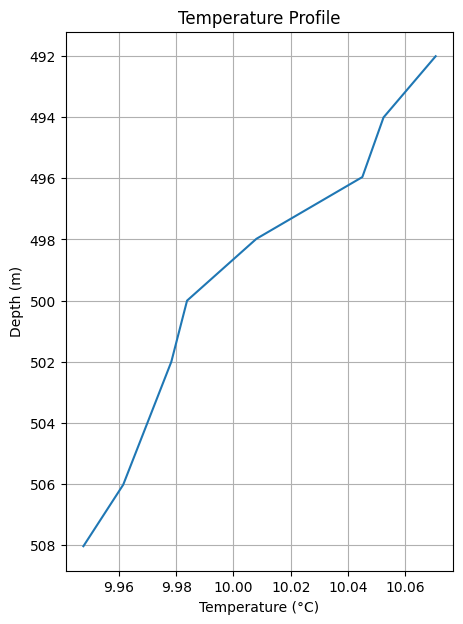

In [6]:
# Pick one profile
one_profile = result[result["source_file"] == result["source_file"].iloc[0]]

plt.figure(figsize=(5,7))
plt.plot(one_profile["TEMP"], one_profile["DEPTH_M"])
plt.gca().invert_yaxis()
plt.title("Temperature Profile")
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.grid(True)
plt.show()


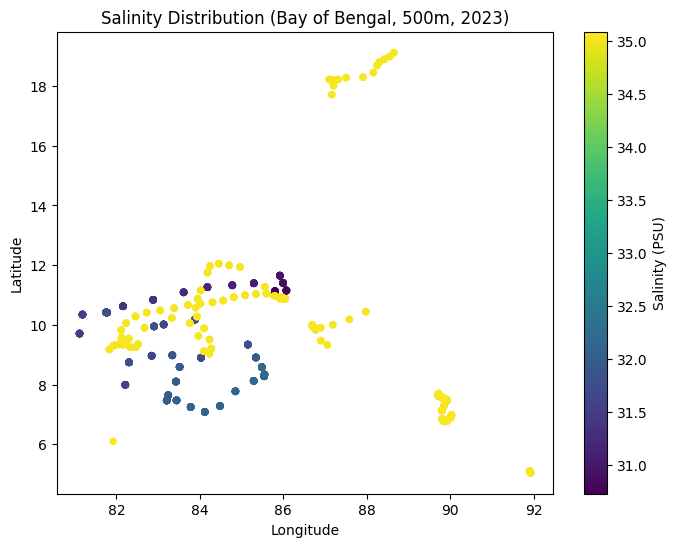

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(result["LONGITUDE"], result["LATITUDE"],
            c=result["PSAL"], cmap="viridis", s=20)
plt.colorbar(label="Salinity (PSU)")
plt.title("Salinity Distribution (Bay of Bengal, 500m, 2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


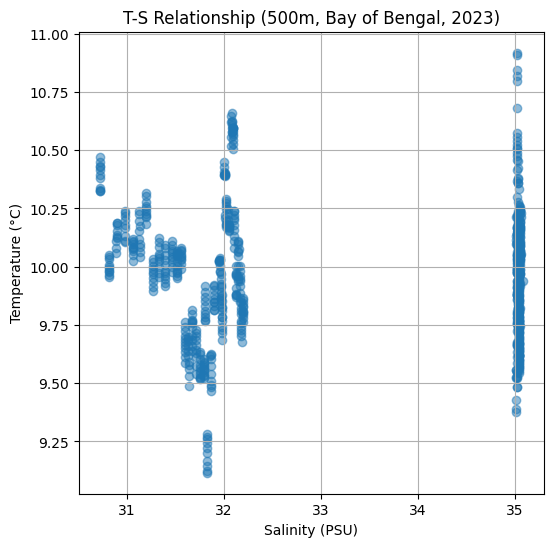

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(result["PSAL"], result["TEMP"], alpha=0.5)
plt.xlabel("Salinity (PSU)")
plt.ylabel("Temperature (°C)")
plt.title("T-S Relationship (500m, Bay of Bengal, 2023)")
plt.grid(True)
plt.show()


📊 Running query for bay_of_bengal, 500m, 2023, variable=TEMP...
✅ Subset ready: (754, 7)


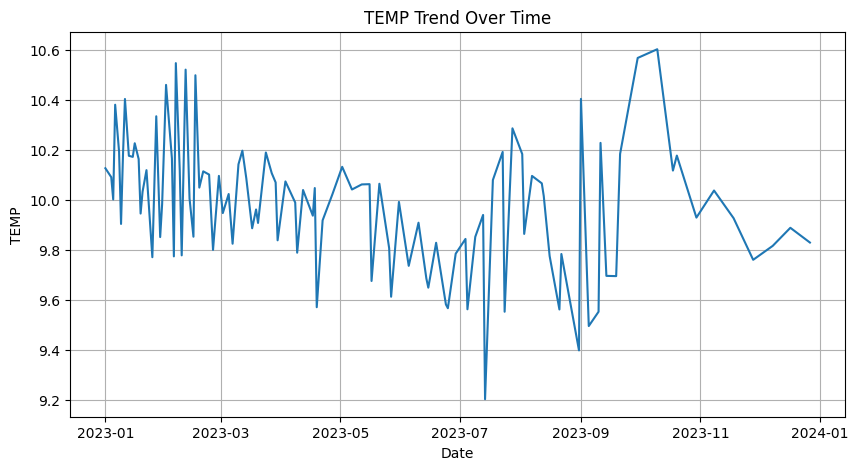

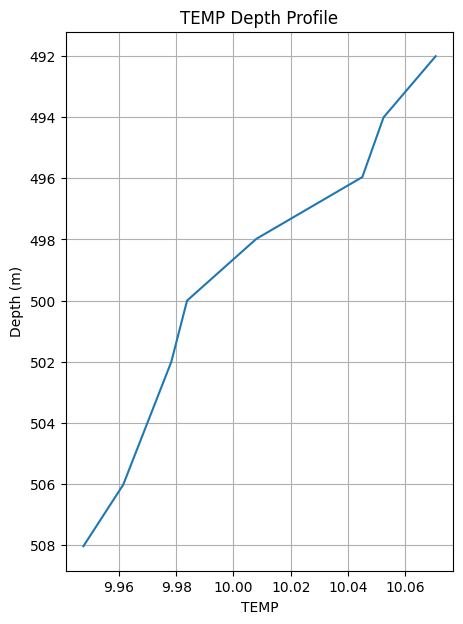

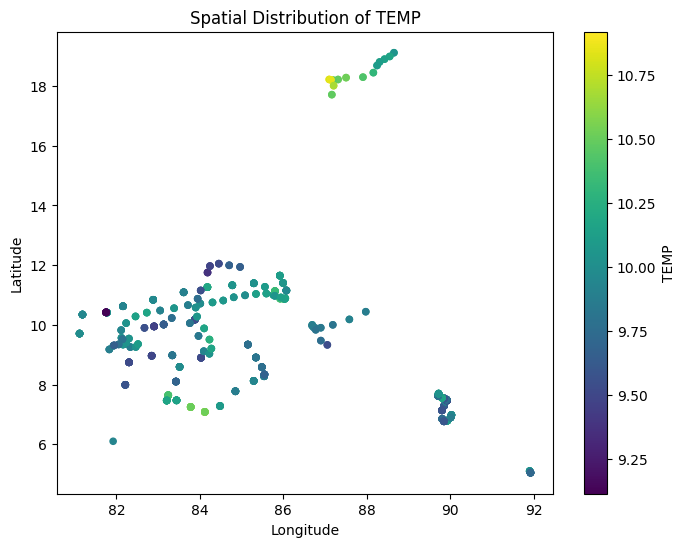

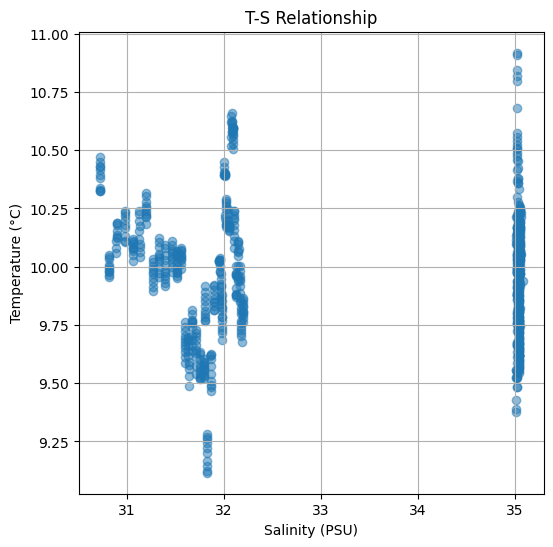

In [11]:
# Bay of Bengal, 500m depth, year 2023
result = run_query("bay_of_bengal", depth=500, year=2023, variable="TEMP")


In [10]:
# 📓 03_query_examples.ipynb

import dask.dataframe as dd
import matplotlib.pyplot as plt

# --- Setup ---
PARQUET_PATH = "/content/drive/MyDrive/ColabNotebooks/SIH2025/Data/argo_prototype_parquet/*.parquet"

# Load with Dask
df = dd.read_parquet(PARQUET_PATH)


# --- Helper Functions ---
def filter_region(df, region, depth, year):
    """Apply region, depth and year filters to the dataframe"""
    if region == "bay_of_bengal":
        lat_range, lon_range = (5, 20), (80, 95)
    elif region == "arabian_sea":
        lat_range, lon_range = (5, 25), (55, 75)
    else:
        raise ValueError("Region not supported")

    subset = df[
        (df.LATITUDE.between(*lat_range)) &
        (df.LONGITUDE.between(*lon_range)) &
        (df.DEPTH_M.between(depth-10, depth+10)) &
        (df.JULD.dt.year == year)
    ]
    return subset.compute()


def plot_trend(df, variable="TEMP"):
    trend = df.groupby(df["JULD"].dt.date)[variable].mean()
    plt.figure(figsize=(10,5))
    trend.plot()
    plt.title(f"{variable} Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel(variable)
    plt.grid(True)
    plt.show()


def plot_profile(df, variable="TEMP"):
    one_profile = df[df["source_file"] == df["source_file"].iloc[0]]
    plt.figure(figsize=(5,7))
    plt.plot(one_profile[variable], one_profile["DEPTH_M"])
    plt.gca().invert_yaxis()
    plt.title(f"{variable} Depth Profile")
    plt.xlabel(variable)
    plt.ylabel("Depth (m)")
    plt.grid(True)
    plt.show()


def plot_spatial(df, variable="PSAL"):
    plt.figure(figsize=(8,6))
    plt.scatter(df["LONGITUDE"], df["LATITUDE"],
                c=df[variable], cmap="viridis", s=20)
    plt.colorbar(label=variable)
    plt.title(f"Spatial Distribution of {variable}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


def plot_ts_relationship(df):
    plt.figure(figsize=(6,6))
    plt.scatter(df["PSAL"], df["TEMP"], alpha=0.5)
    plt.xlabel("Salinity (PSU)")
    plt.ylabel("Temperature (°C)")
    plt.title("T-S Relationship")
    plt.grid(True)
    plt.show()


# --- Master Function ---
def run_query(region, depth, year, variable="TEMP"):
    """Filter data & show all standard plots"""
    print(f"📊 Running query for {region}, {depth}m, {year}, variable={variable}...")
    subset = filter_region(df, region, depth, year)
    print("✅ Subset ready:", subset.shape)

    if subset.empty:
        print("⚠ No data found for this query")
        return

    # Generate plots
    plot_trend(subset, variable)
    plot_profile(subset, variable)
    plot_spatial(subset, variable)
    plot_ts_relationship(subset)
    return subset


In [13]:
import dask.dataframe as dd
import pandas as pd

# Load parquet data
df = dd.read_parquet("/content/drive/MyDrive/ColabNotebooks/SIH2025/Data/argo_prototype_parquet")

# --- Filter functions ---

def filter_by_region(df, lat_min=None, lat_max=None, lon_min=None, lon_max=None):
    q = df
    if lat_min is not None and lat_max is not None:
        q = q[(q['LATITUDE'] >= lat_min) & (q['LATITUDE'] <= lat_max)]
    if lon_min is not None and lon_max is not None:
        q = q[(q['LONGITUDE'] >= lon_min) & (q['LONGITUDE'] <= lon_max)]
    return q

def filter_by_depth(df, depth_min=None, depth_max=None):
    q = df
    if depth_min is not None and depth_max is not None:
        q = q[(q['DEPTH_M'] >= depth_min) & (q['DEPTH_M'] <= depth_max)]
    return q

def filter_by_time(df, year_min=None, year_max=None):
    q = df
    # Ensure JULD is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['JULD']):
        q = q.assign(JULD=dd.to_datetime(q['JULD']))
    if year_min is not None:
        q = q[q['JULD'].dt.year >= year_min]
    if year_max is not None:
        q = q[q['JULD'].dt.year <= year_max]
    return q

def filter_by_source(df, sources=None):
    q = df
    if sources:
        q = q[q['source_file'].isin(sources)]
    return q

# --- Unified query function ---
def query_data(df, lat_range=None, lon_range=None, depth_range=None, year_range=None, sources=None, limit=5):
    q = df
    if lat_range: q = filter_by_region(q, lat_range[0], lat_range[1], None, None)
    if lon_range: q = filter_by_region(q, None, None, lon_range[0], lon_range[1])
    if depth_range: q = filter_by_depth(q, depth_range[0], depth_range[1])
    if year_range: q = filter_by_time(q, year_range[0], year_range[1])
    if sources: q = filter_by_source(q, sources)

    # Compute result (limit rows for preview)
    return q.head(limit)


In [15]:
# 1. Filter by region (Indian Ocean)
query_data(df, lat_range=(-30, 30), lon_range=(40, 100))

# 2. Filter by depth
query_data(df, depth_range=(0, 200))

# 3. Filter by year
query_data(df, year_range=(2015, 2018))

# 4. Filter by source file
query_data(df, sources=['file1.nc', 'file2.nc'])

# 5. Combine filters
query_data(df, lat_range=(-20, 20), lon_range=(50, 80), depth_range=(0, 100), year_range=(2010, 2020))


/usr/local/lib/python3.12/dist-packages/dask/dataframe/core.py:382: UserWarning: Insufficient elements for `head`. 5 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/dask/dataframe/core.py:382: UserWarning: Insufficient elements for `head`. 5 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/dask/dataframe/core.py:382: UserWarning: Insufficient elements for `head`. 5 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


,LATITUDE,LONGITUDE,JULD,DEPTH_M,TEMP,PSAL,source_file


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['LATITUDE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'LATITUDE'}, axis=1)
              .sort_values('LATITUDE', ascending=True))
  xs = counted['LATITUDE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('LATITUDE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('LATITUDE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['LONGITUDE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'LONGITUDE'}, axis=1)
              .sort_values('LONGITUDE', ascending=True))
  xs = counted['LONGITUDE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('LONGITUDE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('LONGITUDE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DEPTH_M']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DEPTH_M'}, axis=1)
              .sort_values('DEPTH_M', ascending=True))
  xs = counted['DEPTH_M']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('DEPTH_M', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DEPTH_M')
_ = plt.ylabel('count()')

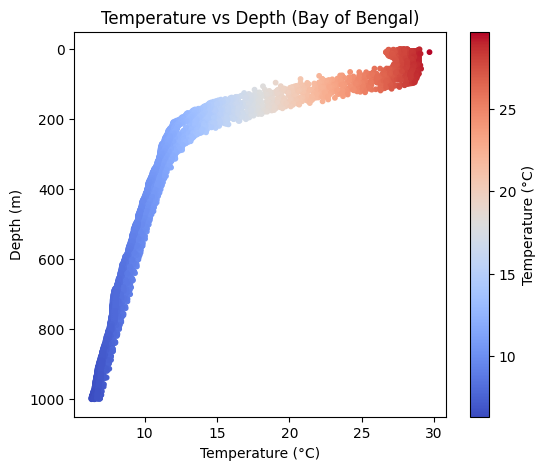

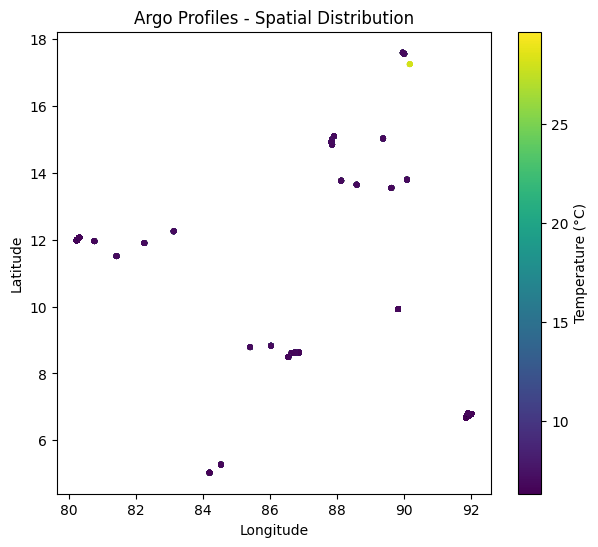

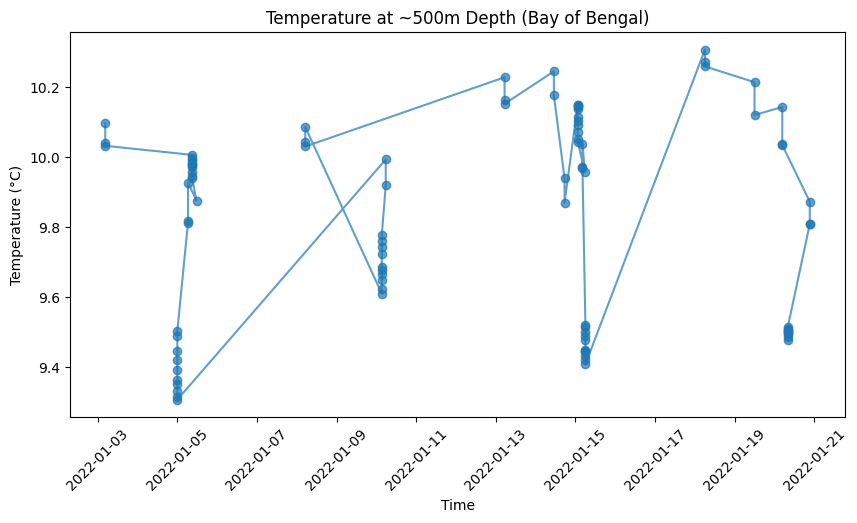

In [16]:
import matplotlib.pyplot as plt

# Example 1: Temperature vs Depth (for a subset)
subset = query_data(df, lat_range=(5, 20), lon_range=(80, 95), depth_range=(0, 1000), year_range=(2020, 2023), limit=5000)

plt.figure(figsize=(6, 5))
plt.scatter(subset["TEMP"], subset["DEPTH_M"], c=subset["TEMP"], cmap="coolwarm", s=10)
plt.gca().invert_yaxis()  # Depth increases downward
plt.colorbar(label="Temperature (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("Temperature vs Depth (Bay of Bengal)")
plt.show()


# Example 2: Spatial distribution of Argo floats
plt.figure(figsize=(7, 6))
plt.scatter(subset["LONGITUDE"], subset["LATITUDE"], c=subset["TEMP"], cmap="viridis", s=10)
plt.colorbar(label="Temperature (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Argo Profiles - Spatial Distribution")
plt.show()


# Example 3: Time-series (Temperature at ~500m depth)
time_subset = subset[(subset["DEPTH_M"].between(490, 510))]

plt.figure(figsize=(10, 5))
plt.plot(time_subset["JULD"], time_subset["TEMP"], marker="o", linestyle="-", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature at ~500m Depth (Bay of Bengal)")
plt.xticks(rotation=45)
plt.show()


In [17]:
result = query_data(df, lat_range=(5,20), lon_range=(80,95), depth_range=(0,1000), year_range=(2020,2023))


In [18]:
def plot_temp_vs_depth(df, title="Temperature vs Depth"):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 5))
    plt.scatter(df["TEMP"], df["DEPTH_M"], c=df["TEMP"], cmap="coolwarm", s=10)
    plt.gca().invert_yaxis()
    plt.colorbar(label="Temperature (°C)")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Depth (m)")
    plt.title(title)
    plt.show()

def plot_spatial_distribution(df, title="Spatial Distribution of Profiles"):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7, 6))
    plt.scatter(df["LONGITUDE"], df["LATITUDE"], c=df["TEMP"], cmap="viridis", s=10)
    plt.colorbar(label="Temperature (°C)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.show()

def plot_time_series(df, depth_range=(490, 510), title="Temperature Time Series"):
    import matplotlib.pyplot as plt
    subset = df[df["DEPTH_M"].between(*depth_range)]
    plt.figure(figsize=(10, 5))
    plt.plot(subset["JULD"], subset["TEMP"], marker="o", linestyle="-", alpha=0.7)
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


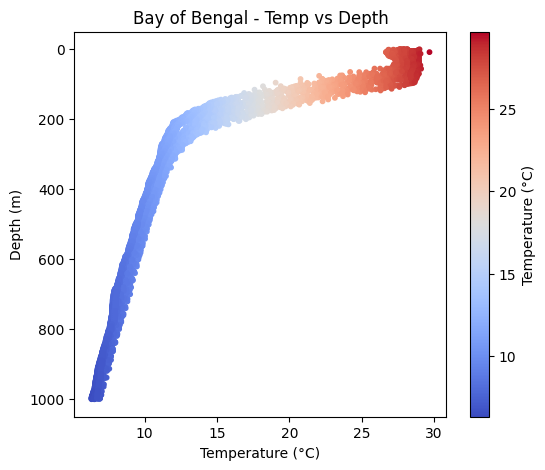

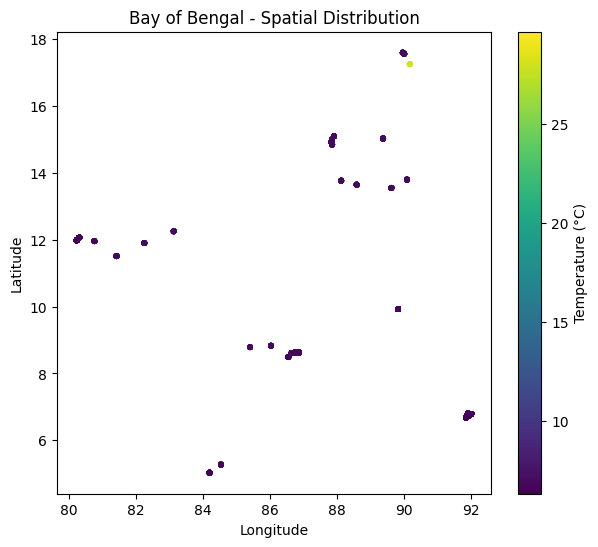

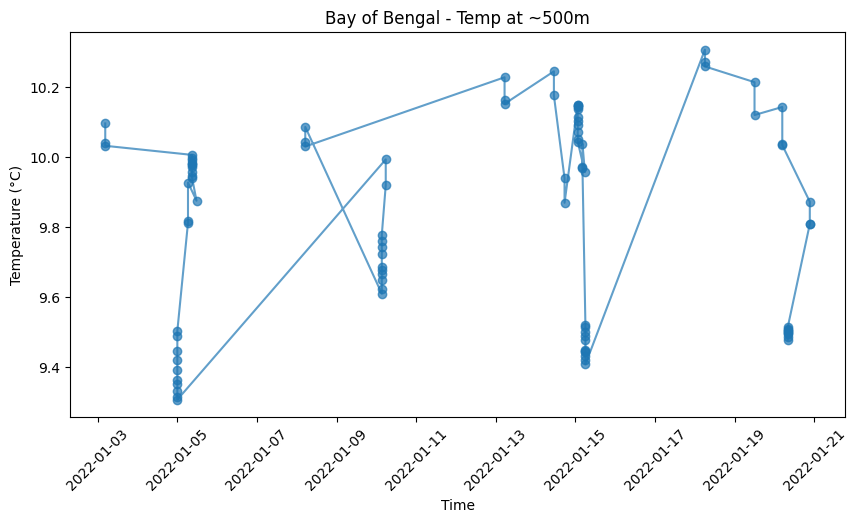

In [19]:
subset = query_data(df, lat_range=(5,20), lon_range=(80,95), depth_range=(0,1000), year_range=(2020,2023), limit=5000)

plot_temp_vs_depth(subset, "Bay of Bengal - Temp vs Depth")
plot_spatial_distribution(subset, "Bay of Bengal - Spatial Distribution")
plot_time_series(subset, (490,510), "Bay of Bengal - Temp at ~500m")


Loading Dask dataset (lazy)...
Parsing query...
Plan: {
  "action": "query",
  "variables": [
    "TEMP"
  ],
  "time_range": {
    "start": null,
    "end": null
  },
  "depth_range_m": {
    "min": 0,
    "max": 15
  },
  "region": null,
  "explain": "Auto-generated plan to fetch variables and filters from Parquet.",
  "sql_like": "SELECT * FROM measurements WHERE variables IN ('TEMP') AND depth_m BETWEEN 0 AND 15"
}
Executing plan (will compute subset)...
Returned rows: 2000
      LATITUDE  LONGITUDE                          JULD  DEPTH_M       TEMP  \
0     -0.48800   51.36000 2022-01-03 18:14:39.001951488     4.19  27.941999   
1     -0.48800   51.36000 2022-01-03 18:14:39.001951488     6.09  27.941999   
2     -0.48800   51.36000 2022-01-03 18:14:39.001951488     8.09  27.943001   
3     -0.48800   51.36000 2022-01-03 18:14:39.001951488    10.09  27.936001   
4     -0.48800   51.36000 2022-01-03 18:14:39.001951488    12.09  27.934999   
5     -0.48800   51.36000 2022-01-03 18:14:

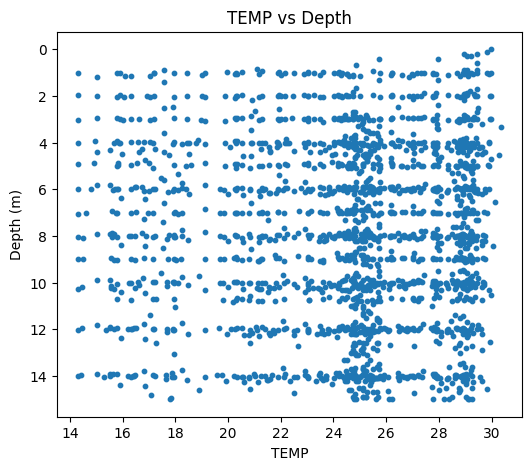

In [20]:
# query_planner.py
import re
import json
import pandas as pd
import numpy as np
import dask.dataframe as dd
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# -------- CONFIG --------
PARQUET_DIR = "/content/drive/MyDrive/ColabNotebooks/SIH2025/Data/argo_prototype_parquet"  # update
METADATA_CSV = os.path.join(PARQUET_DIR, "..", "argo_metadata_catalog.csv")  # update path if needed
DASK_READ_PATTERN = os.path.join(PARQUET_DIR, "*.parquet")

# Allowed variable names mapping from user-friendly to column names
VARIABLE_ALIASES = {
    "temperature": "TEMP", "temp": "TEMP",
    "salinity": "PSAL", "psal": "PSAL",
    "pressure": "PRES", "depth": "DEPTH_M",
}

# Region keywords (examples). Add other regions if needed.
REGIONS = {
    "bay of bengal": {"lat_min": 5, "lat_max": 20, "lon_min": 80, "lon_max": 95},
    "arabian sea": {"lat_min": 5, "lat_max": 25, "lon_min": 55, "lon_max": 75},
    "indian ocean": {"lat_min": -40, "lat_max": 30, "lon_min": 30, "lon_max": 110},
}

# ---------- Helpers ----------
def load_metadata(path=METADATA_CSV):
    if os.path.exists(path):
        return pd.read_csv(path)
    else:
        return None

def load_dask_dataframe(pattern=DASK_READ_PATTERN):
    # lazy read
    return dd.read_parquet(pattern)

# parse a simple time phrase like "last 3 months", "2023", "2023-01 to 2023-03"
def parse_time_phrase(text):
    text = text.lower()
    now = pd.Timestamp.now()
    m = re.search(r"last\s+(\d+)\s+month", text)
    if m:
        months = int(m.group(1))
        start = (now - pd.DateOffset(months=months)).normalize()
        end = now
        return start, end
    m = re.search(r"last\s+(\d+)\s+day", text)
    if m:
        days = int(m.group(1))
        start = now - pd.Timedelta(days=days)
        return start, now
    # try to find year
    m = re.search(r"(20\d{2})", text)
    if m:
        year = int(m.group(1))
        start = pd.Timestamp(f"{year}-01-01")
        end = pd.Timestamp(f"{year}-12-31 23:59:59")
        return start, end
    return None, None

# parse variables requested
def parse_variables(text):
    found = []
    for name, col in VARIABLE_ALIASES.items():
        if re.search(r"\b" + re.escape(name) + r"\b", text, re.I):
            if col not in found:
                found.append(col)
    # fallback: look for column names directly
    for col in ["TEMP", "PSAL", "PRES"]:
        if re.search(r"\b" + col.lower() + r"\b", text.lower()):
            if col not in found:
                found.append(col)
    # default to TEMP if nothing found
    if not found:
        found = ["TEMP"]
    return found

def parse_depth(text):
    # look for numeric + unit (e.g., "500 m", "500m", "at 500m", "around 500 m")
    m = re.search(r"(\d{1,4})\s*(m|meter|metre)?", text)
    if m:
        val = int(m.group(1))
        # small tolerance +/-10 m by default
        return max(0, val - 10), val + 10
    # ranges like 0-100m
    m = re.search(r"(\d{1,4})\s*-\s*(\d{1,4})\s*(m|meter)?", text)
    if m:
        return int(m.group(1)), int(m.group(2))
    return None, None

def parse_region(text):
    text = text.lower()
    for rname, bbox in REGIONS.items():
        if rname in text:
            return bbox
    # try “bay of bengal” etc present in text
    return None

# Build structured "plan" from text
def plan_from_text(nlq: str):
    nlq_l = nlq.lower()
    vars_ = parse_variables(nlq)
    start_time, end_time = parse_time_phrase(nlq)
    dmin, dmax = parse_depth(nlq)
    region_bbox = parse_region(nlq)
    # if user says a named region but also has lat/lon numeric mention, parse might be improved later
    plan = {
        "action": None,
        "variables": vars_,
        "time_range": {"start": str(start_time) if start_time is not None else None,
                       "end": str(end_time) if end_time is not None else None},
        "depth_range_m": {"min": dmin, "max": dmax} if dmin is not None else None,
        "region": region_bbox,
        "explain": None
    }

    # Basic safety / clarifying logic:
    if region_bbox is None and "bay" in nlq_l or "arabian" in nlq_l:
        # prefer clarification in ambiguous cases -- but for now we can set action=clarify
        plan["action"] = "clarify"
        plan["explain"] = "Region ambiguous or not recognized. Did you mean 'Bay of Bengal' or 'Arabian Sea'?"
        return plan

    plan["action"] = "query"
    # textual SQL-like for transparency (not executed as SQL but describes what will be run)
    filters = []
    if vars_:
        filters.append("variables IN (" + ",".join([f"'{v}'" for v in vars_]) + ")")
    if plan["time_range"]["start"]:
        filters.append(f"time >= '{plan['time_range']['start']}' AND time <= '{plan['time_range']['end']}'")
    if plan["depth_range_m"]:
        filters.append(f"depth_m BETWEEN {plan['depth_range_m']['min']} AND {plan['depth_range_m']['max']}")
    if plan["region"]:
        r = plan["region"]
        filters.append(f"lat BETWEEN {r['lat_min']} AND {r['lat_max']} AND lon BETWEEN {r['lon_min']} AND {r['lon_max']}")
    plan["sql_like"] = "SELECT * FROM measurements WHERE " + " AND ".join(filters) if filters else "SELECT * FROM measurements"
    plan["explain"] = "Auto-generated plan to fetch variables and filters from Parquet."
    return plan

# Execute plan using Dask DataFrame
def execute_plan(plan: dict, dask_df: dd.DataFrame, limit=10000):
    if plan.get("action") != "query":
        return {"error": "Plan not executable", "plan": plan}

    df = dask_df
    # apply region
    if plan.get("region") is not None:
        r = plan["region"]
        df = df[(df["LATITUDE"] >= r["lat_min"]) & (df["LATITUDE"] <= r["lat_max"]) &
                (df["LONGITUDE"] >= r["lon_min"]) & (df["LONGITUDE"] <= r["lon_max"])]

    # time
    tr = plan.get("time_range")
    if tr and tr["start"]:
        start = pd.to_datetime(tr["start"])
        end = pd.to_datetime(tr["end"])
        # ensure JULD is datetime (Dask supports dt accessor)
        df = df[(df["JULD"] >= start) & (df["JULD"] <= end)]

    # depth
    dr = plan.get("depth_range_m")
    if dr:
        df = df[(df["DEPTH_M"] >= dr["min"]) & (df["DEPTH_M"] <= dr["max"])]

    # variables: we won't drop columns, but we'll try to filter to rows where one of the variables is not-null.
    vars_ = plan.get("variables", [])
    if vars_:
        cond = False
        for v in vars_:
            if v in df.columns:
                if cond is False:
                    cond = df[v].notnull()
                else:
                    cond = cond | df[v].notnull()
        # if any variable present, filter rows
        if cond is not False:
            df = df[cond]

    # limit
    result = df.head(limit, compute=True)  # Dask: head computes the partition(s)
    return {"plan": plan, "result": result}

# Simple plotting decision engine
def visualize_result(result_df: pd.DataFrame, plan: dict):
    # Decide plot type
    if result_df.empty:
        print("No rows returned — nothing to plot.")
        return
    vars_ = plan.get("variables", ["TEMP"])
    # if one variable + depth -> depth profile
    if "DEPTH_M" in result_df.columns and len(vars_) == 1:
        v = vars_[0]
        plt.figure(figsize=(6,5))
        plt.scatter(result_df[v], result_df["DEPTH_M"], s=10)
        plt.gca().invert_yaxis()
        plt.xlabel(v)
        plt.ylabel("Depth (m)")
        plt.title(f"{v} vs Depth")
        plt.show()
        return
    # if many variables and JULD -> time series of mean per day at chosen depth
    if "JULD" in result_df.columns:
        df = result_df.copy()
        if "DEPTH_M" in df.columns:
            # aggregate to daily mean
            df["JULD_date"] = pd.to_datetime(df["JULD"]).dt.date
            agg = df.groupby("JULD_date")[vars_].mean().reset_index()
            agg["JULD_date"] = pd.to_datetime(agg["JULD_date"])
            plt.figure(figsize=(10,4))
            for v in vars_:
                if v in agg.columns:
                    plt.plot(agg["JULD_date"], agg[v], marker="o", label=v)
            plt.legend()
            plt.xlabel("Date")
            plt.ylabel("Value")
            plt.title("Time series (daily mean)")
            plt.xticks(rotation=45)
            plt.show()
            return
    # fallback spatial
    if "LATITUDE" in result_df.columns and "LONGITUDE" in result_df.columns:
        plt.figure(figsize=(7,5))
        c = vars_[0] if vars_[0] in result_df.columns else None
        plt.scatter(result_df["LONGITUDE"], result_df["LATITUDE"], c=result_df[c] if c else None, s=8)
        plt.colorbar(label=c)
        plt.title("Spatial distribution")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
        return

# ---------- Example usage ----------
if __name__ == "__main__":
    import sys
    # Example interactive run:
    # python query_planner.py "Compare salinity and temperature at 500m depth in the Bay of Bengal over the last 3 months."
    if len(sys.argv) > 1:
        nlq = " ".join(sys.argv[1:])
    else:
        nlq = input("Enter natural language query: ")

    print("Loading Dask dataset (lazy)...")
    ddf = load_dask_dataframe()
    print("Parsing query...")
    plan = plan_from_text(nlq)
    print("Plan:", json.dumps(plan, indent=2))
    if plan.get("action") == "clarify":
        print("Clarify question:", plan["explain"])
        sys.exit(0)

    print("Executing plan (will compute subset)...")
    out = execute_plan(plan, ddf, limit=2000)
    res_df = out.get("result")
    print("Returned rows:", None if res_df is None else len(res_df))
    if isinstance(res_df, pd.DataFrame):
        print(res_df.head(10))
        visualize_result(res_df, plan)
